### EDA Project

I have selected the client Timothy Stevens who is a seller and who owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise.

To the following stake holder requirements I have formulated the following hypothesis.

**Hypothesis:**

1. Price adjustment to the expensive apartments can cause a sale within a period of one year.<br>
2. Renovating the current state of the apartments would lead to increase in profit margins.<br>
3. Homes in central zip codes have higher prices regardless of grade or condition.<br>

1. Handle the Imports

In [1]:
import pandas as pd
import numpy as np
from time import sleep
import missingno as msno
pd.__version__

'2.3.3'

1.1 Get Data into dataframes

In [2]:
df_prices = pd.read_csv('data\eda_price_data.csv', delimiter=',')
df_housing = pd.read_csv('data\eda_house_details.csv', delimiter=',')


1.2 Check the individual data

In [3]:
price_data_list = [df_prices.head(10),df_prices.info()]

for i in price_data_list:
    print(i)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB
         date      price    house_id  id
0  2014-10-13   221900.0  7129300520   1
1  2014-12-09   538000.0  6414100192   2
2  2015-02-25   180000.0  5631500400   3
3  2014-12-09   604000.0  2487200875   4
4  2015-02-18   510000.0  1954400510   5
5  2014-05-12  1230000.0  7237550310   6
6  2014-06-27   257500.0  1321400060   7
7  2015-01-15   291850.0  2008000270   8
8  2015-04-15   229500.0  2414600126   9
9  2015-03-12   323000.0  3793500160  10
None


In [4]:
housing_data_list = [df_housing.head(10),df_housing.info()]

for i in housing_data_list:
    print(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

<Axes: >

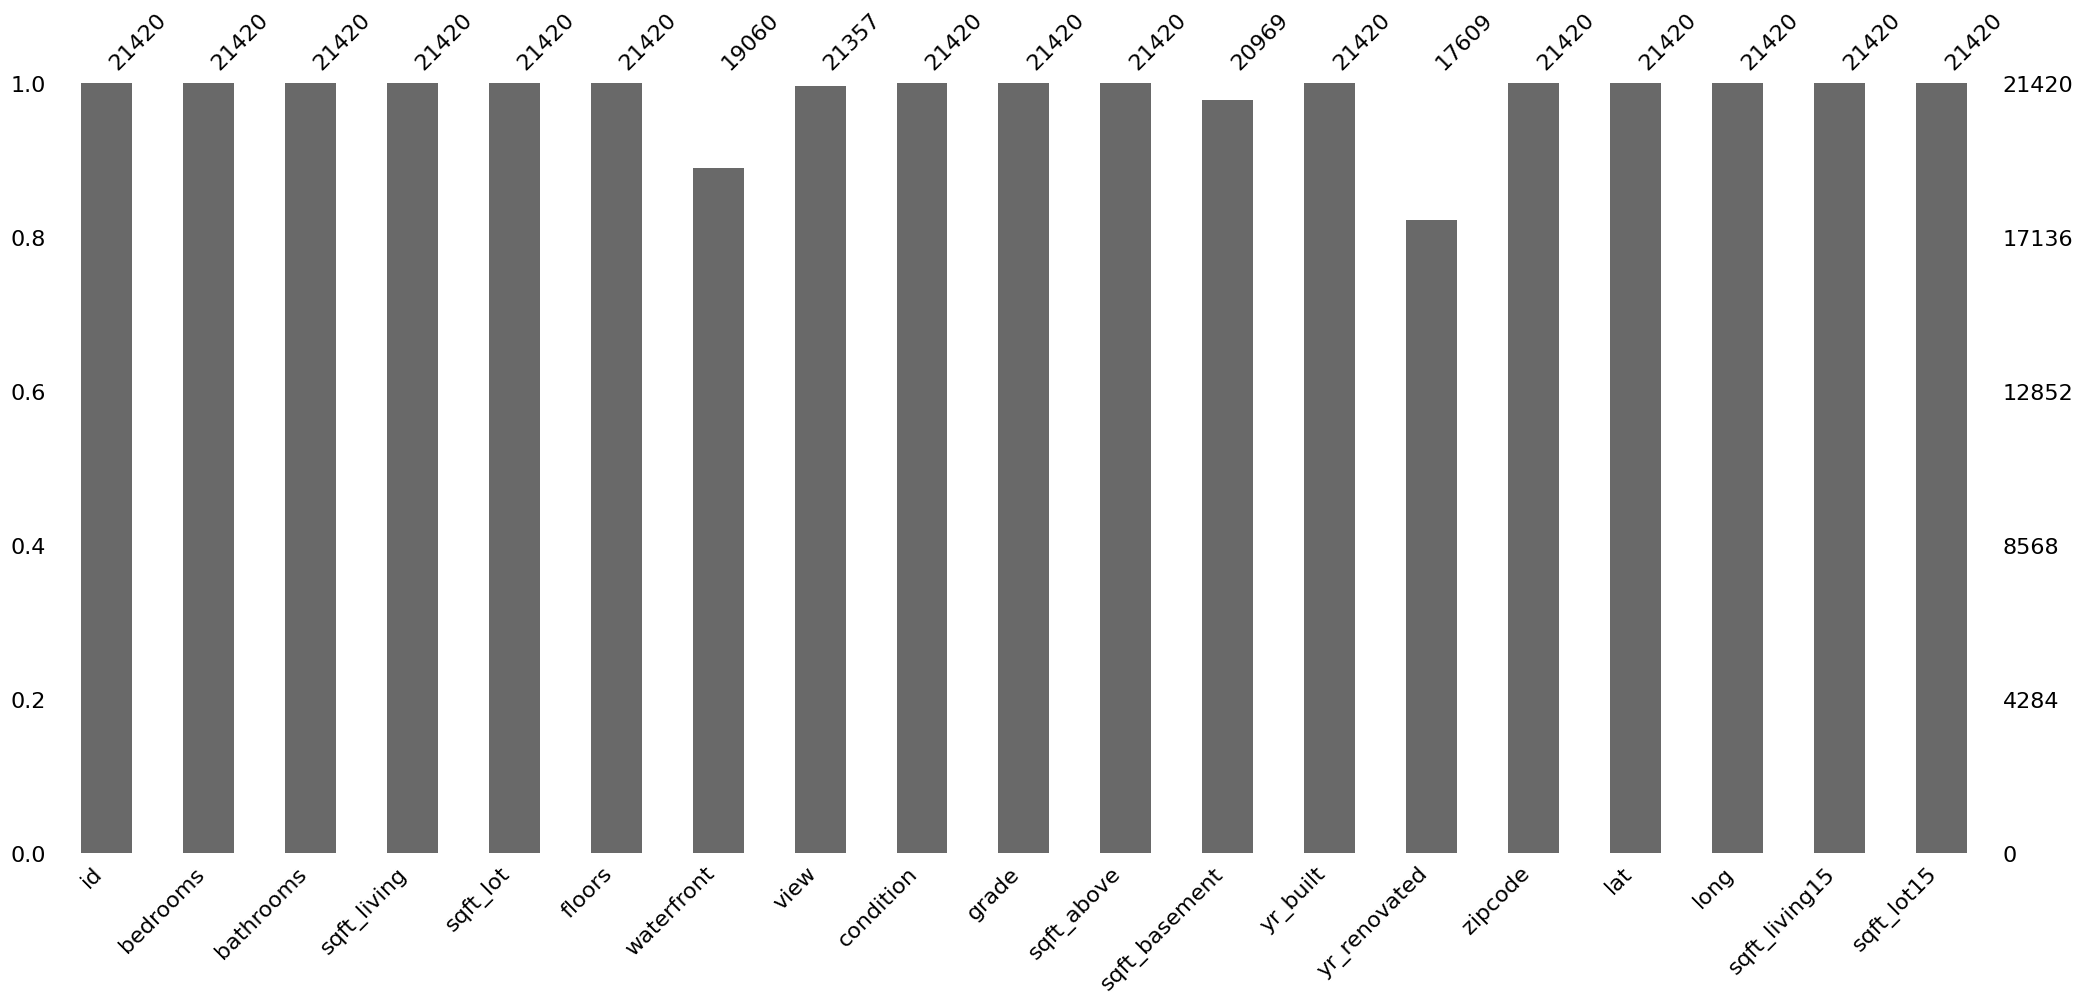

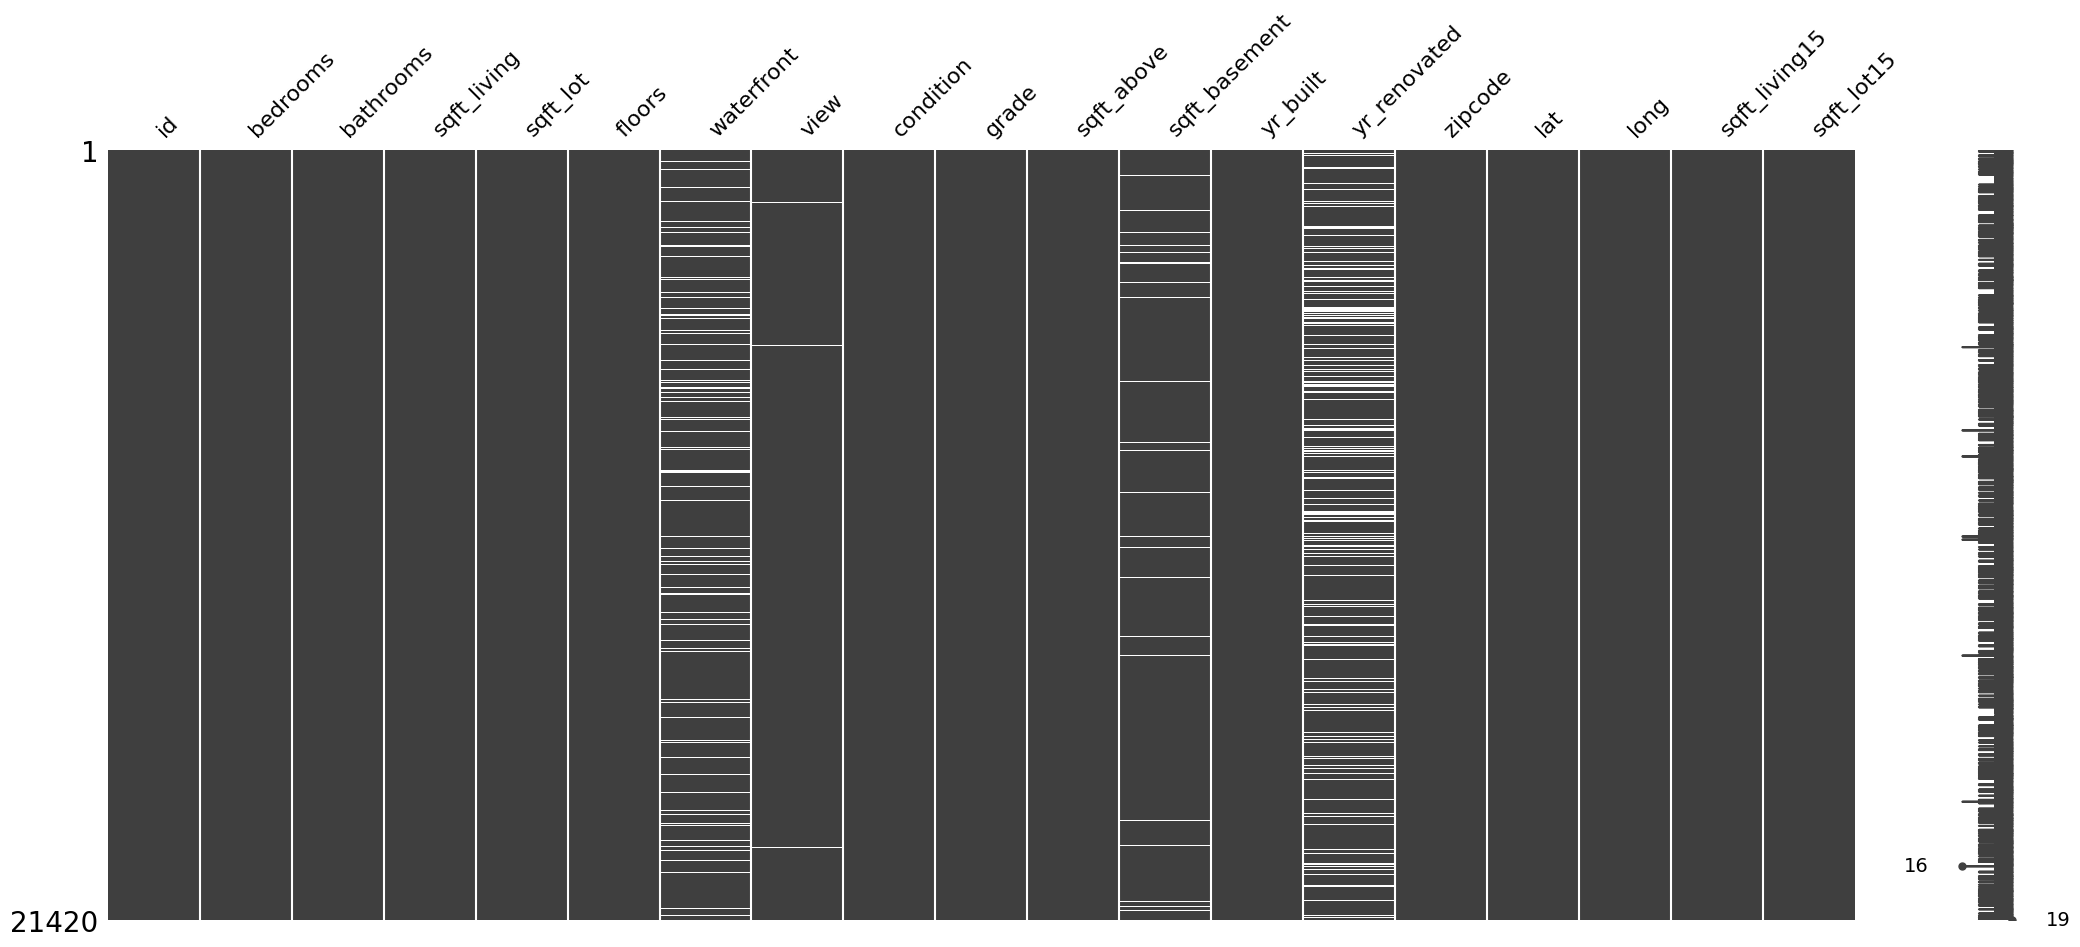

In [5]:
# Finding clues within the data for better decision making

msno.bar(df_housing)
msno.matrix(df_housing)

<Axes: >

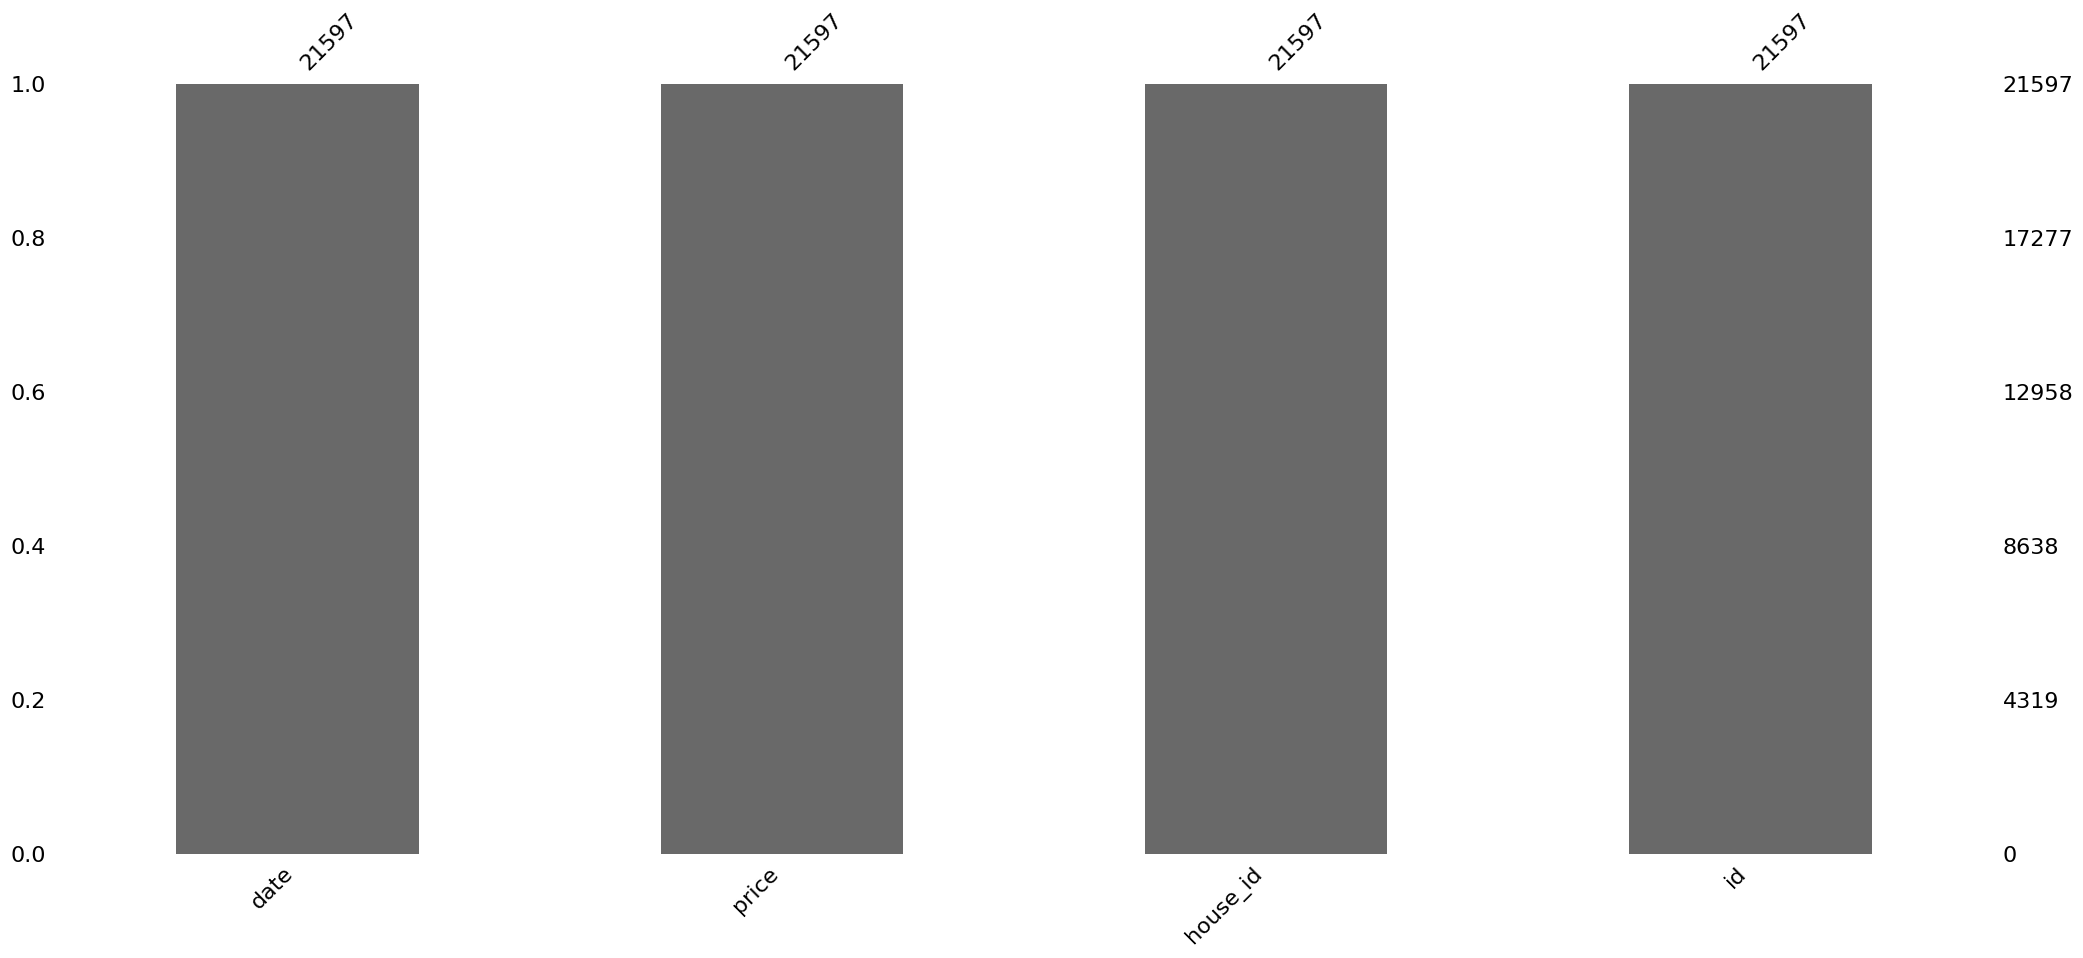

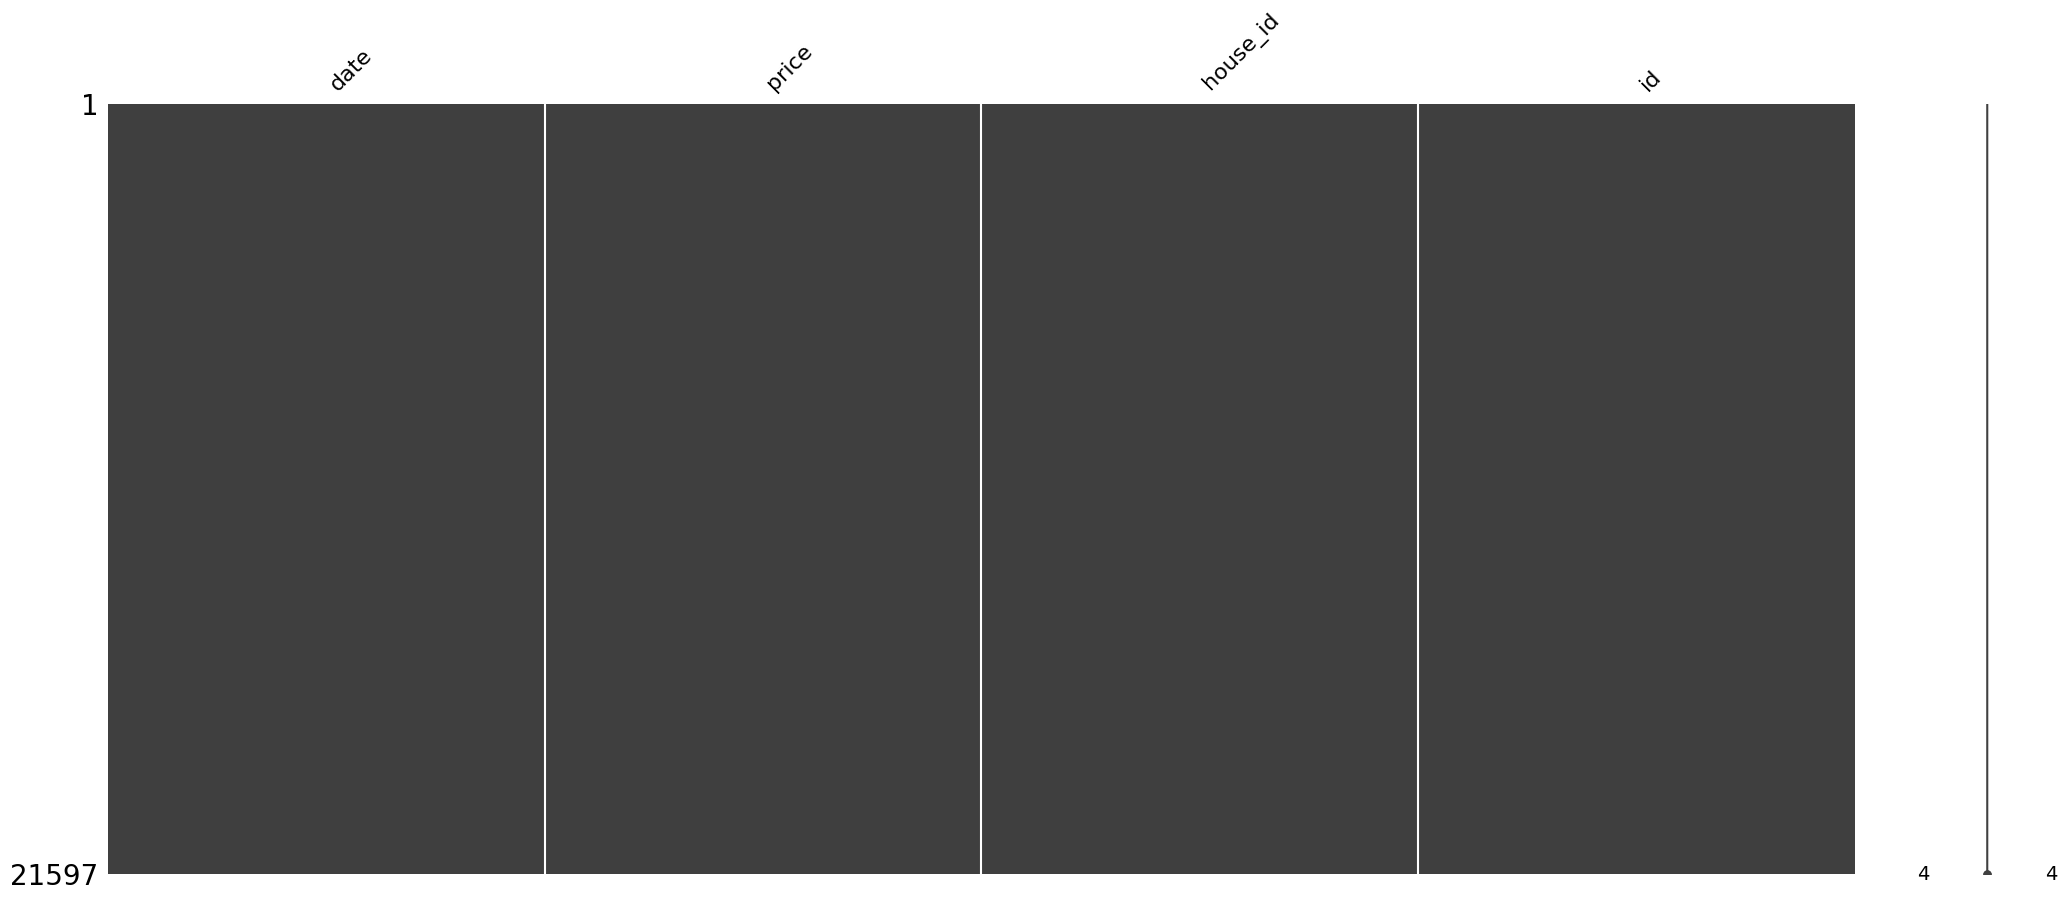

In [6]:
# Finding clues within the data for better decision making

msno.bar(df_prices)
msno.matrix(df_prices)

In [7]:
df_prices.head(20)

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5
5,2014-05-12,1230000.0,7237550310,6
6,2014-06-27,257500.0,1321400060,7
7,2015-01-15,291850.0,2008000270,8
8,2015-04-15,229500.0,2414600126,9
9,2015-03-12,323000.0,3793500160,10


In [8]:
# Join the pandas table based upon the primary_key
df_housing.head(20)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.00,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.00,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.00,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.50,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.00,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0
5,100300280,3.0,2.25,1430.0,4777.0,2.0,0.0,0.0,3,7,1430.0,0.0,2010,0.0,98059,47.4867,-122.152,1639.0,3854.0
6,100300500,3.0,2.50,1520.0,3041.0,2.0,0.0,0.0,3,7,1520.0,0.0,2009,NaN,98059,47.4874,-122.152,1820.0,3229.0
7,100300530,3.0,2.50,1520.0,3003.0,2.0,0.0,0.0,3,7,1520.0,0.0,2009,0.0,98059,47.4876,-122.153,1820.0,3030.0
8,1003400155,3.0,1.00,1100.0,7657.0,1.0,0.0,0.0,3,7,1100.0,0.0,1955,0.0,98188,47.4374,-122.285,1300.0,8000.0
9,1003400245,3.0,1.00,1130.0,9907.0,1.0,0.0,0.0,3,7,1130.0,0.0,1954,0.0,98188,47.4362,-122.286,1320.0,9907.0


In [9]:
updated_prices = df_prices.sort_values(by =['house_id'])
updated_prices.reset_index(inplace=True)
# updated_prices.head()

In [10]:
# Join the tables now
df_list = [df_housing, updated_prices]
# result = pd.concat(df_list, axis=1).reindex(df_housing.index)
# result = pd.concat(df_list, axis=1, join="inner")
# result
# updated_prices

In [11]:
df_housing_prices_data = pd.read_csv('data\eda_house_price_details.csv', delimiter=',')
df_housing_prices_data.head(30)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.25700,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.31900,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.23300,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.39300,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.04500,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.00500,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,NaN,1995,0.0,98003,47.3097,-122.32700,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,1963,0.0,98198,47.4095,-122.31500,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.33700,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.03100,2390.0,7570.0,2015-03-12,323000.0


In [12]:
df_housing_prices_data.tail(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21547,9406530090,4.0,2.50,2470.0,5100.0,2.0,0.0,0.0,3,8,...,0.0,2005,0.0,98038,47.3622,-122.041,2240.0,5123.0,2014-10-20,337000.0
21548,7168100015,5.0,2.75,3080.0,5752.0,2.0,0.0,0.0,3,9,...,0.0,2014,0.0,98059,47.4922,-122.153,3000.0,4650.0,2014-10-09,579950.0
21549,5007500120,4.0,2.75,2260.0,4440.0,2.0,0.0,0.0,3,7,...,0.0,2014,0.0,98001,47.3507,-122.291,2260.0,4563.0,2015-02-26,341780.0
21550,3528900770,4.0,3.00,1670.0,2642.0,2.0,NaN,0.0,3,8,...,320.0,2008,0.0,98109,47.6397,-122.345,1670.0,2594.0,2015-04-23,710200.0
21551,9521100031,3.0,3.25,1540.0,1428.0,3.0,0.0,0.0,3,9,...,0.0,2013,NaN,98103,47.6648,-122.353,1660.0,3300.0,2014-06-18,690000.0
21552,524059330,4.0,3.50,3830.0,8963.0,2.0,0.0,0.0,3,10,...,710.0,2014,0.0,98004,47.5990,-122.197,2190.0,10777.0,2015-01-30,1700000.0
21553,6021503705,2.0,2.50,980.0,1020.0,3.0,0.0,0.0,3,8,...,0.0,2008,NaN,98117,47.6844,-122.387,980.0,1023.0,2014-10-15,329000.0
21554,3438501862,3.0,2.50,1450.0,5008.0,1.0,0.0,0.0,3,7,...,610.0,2007,0.0,98106,47.5435,-122.357,2120.0,5019.0,2014-05-13,330000.0
21555,3345700207,4.0,3.50,2850.0,5577.0,2.0,0.0,0.0,3,8,...,900.0,2014,0.0,98056,47.5252,-122.192,2850.0,5708.0,2015-05-02,608500.0
21556,6056111067,3.0,1.75,1140.0,1201.0,2.0,0.0,0.0,3,8,...,0.0,2014,NaN,98108,47.5637,-122.295,1210.0,1552.0,2014-07-07,230000.0


<Axes: >

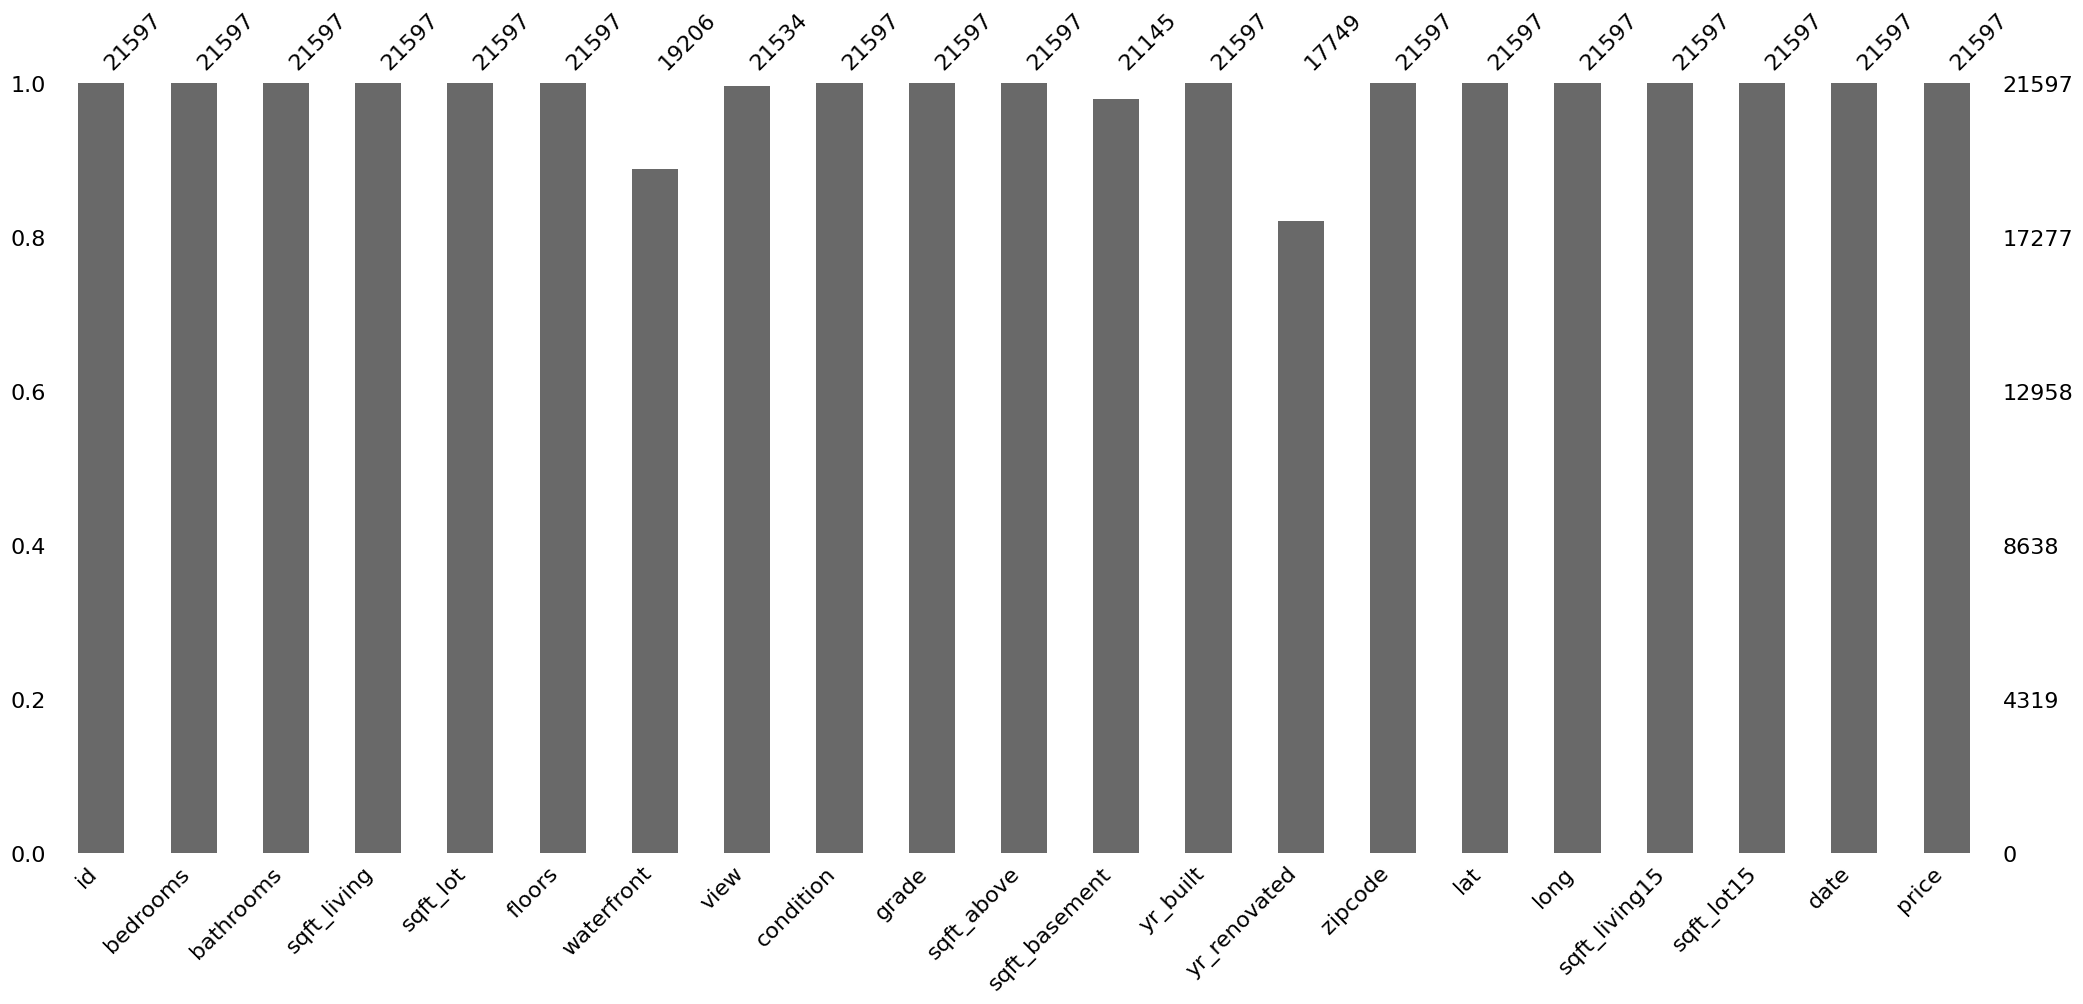

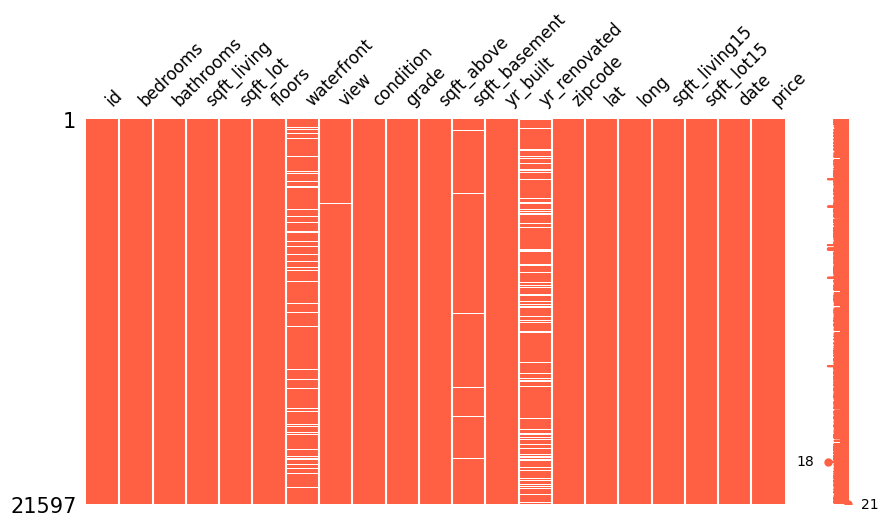

In [13]:

msno.bar(df_housing_prices_data)
# msno.matrix(df_housing_prices_data)
# msno.matrix(df_housing_prices_data, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
msno.matrix(df_housing_prices_data, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))